# Predicción de streams de canciones de Spotify. | Regresión Lineal

- Descripción:

Utiliza un dataset que incluye datos sobre las canciones más populares de 2023 para predecir 
el número total de streams acumulados en Spotify.

In [9]:
# Importamos las librerías necesarias 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargamos el dataset
data = pd.read_csv('spotify-2023.csv', encoding='latin-1') # encoding='latin-1' para evitar errores de lectura 

# Visualizamos los primeros registros
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Limpieza de Datos 

In [6]:
# Eliminamos duplicados 
data = data.drop_duplicates()

# Verificamos valores nulos
print(data.isnull().sum())

# Eliminar valores nulos 
data = data.dropna()

# Verificamos cambios 
print(data.info())

data.head()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Columnas numéricas

                      artist_count  released_year  released_month  \
artist_count              1.000000       0.073564        0.033857   
released_year             0.073564       1.000000        0.076439   
released_month            0.033857       0.076439        1.000000   
released_day             -0.014762       0.166377        0.057784   
in_spotify_playlists     -0.085226      -0.390729       -0.122407   
in_spotify_charts        -0.008570       0.068679       -0.050186   
in_apple_playlists       -0.017024      -0.201474       -0.034029   
in_apple_charts          -0.075271       0.003479       -0.017813   
in_deezer_charts          0.020585       0.095741        0.006942   
bpm                      -0.058844      -0.011570       -0.049400   
danceability_%            0.214078       0.215032       -0.054808   
valence_%                 0.123650      -0.047643       -0.110355   
energy_%                  0.137530       0.078886       -0.086897   
acousticness_%           -0.094704

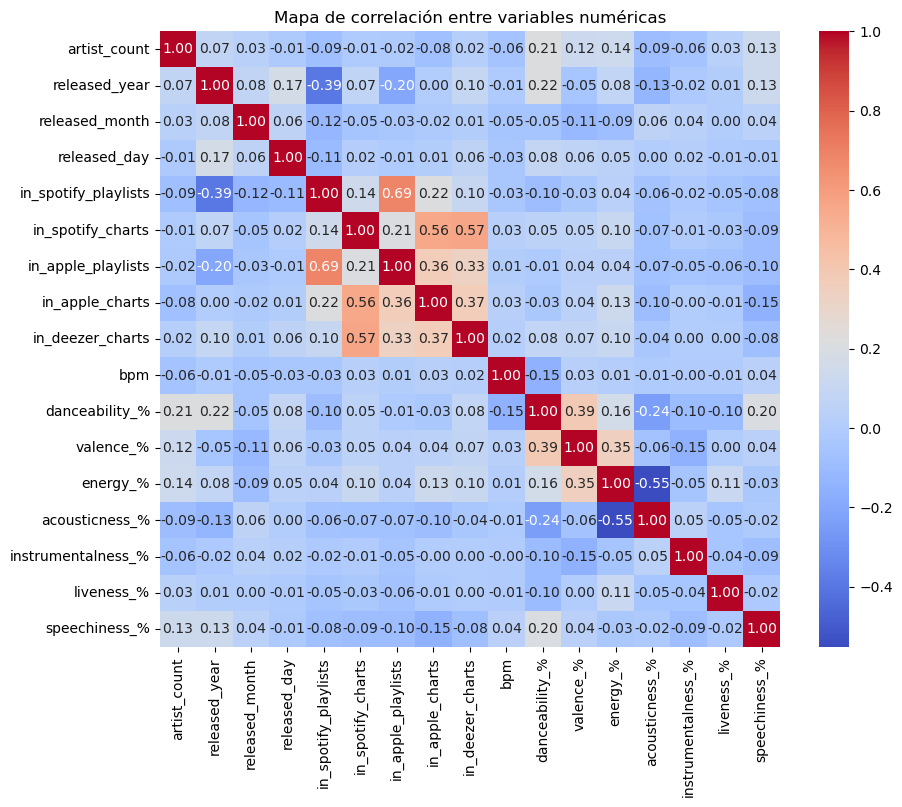

In [8]:
# Seleccionamos columnas numéricas para calcular correlación
data_num = data.select_dtypes(include=[np.number])

# Calculamos correlación
matriz_corr = data_num.corr()

# Visualizamos la matriz de correlación
print(matriz_corr)

# Graficamos el mapa de calor de la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f') # annot=True para mostrar los valores en cada celda, fmt='.2f' para redondear a dos decimales
plt.title('Mapa de correlación entre variables numéricas')
plt.show()

In [12]:
print(data.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


## Preparación de datos 

In [15]:
data_num = data[['streams', 'released_day']]

# Seleccionamos las variables independientes y dependiente
X = data_num[['released_day']]
Y = data_num['streams']

# Verificamos las dimensiones de X y Y
print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de Y: {Y.shape}")

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 80% entrenamiento, 20% prueba, random_state=42 para reproducibilidad

# Verificamos las dimensiones de los conjuntos de entrenamiento y prueba
print(f"\nDimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}, y_test: {Y_test.shape}")
print(f"Dimensiones de X_train: {X_train.shape}, y_train: {Y_train.shape}")

# Normalizamos variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Media y desviación tras la normalización
print(f"\nMedia de X_train_scaled: {np.mean(X_train_scaled, axis=0)}")
print(f"Desviación estándar de X_train_scaled: {np.std(X_train_scaled, axis=0)}")


Dimensiones de X: (953, 1)
Dimensiones de Y: (953,)

Dimensiones de X_train: (762, 1)
Dimensiones de X_test: (191, 1), y_test: (191,)
Dimensiones de X_train: (762, 1), y_train: (762,)

Media de X_train_scaled: [7.92600165e-17]
Desviación estándar de X_train_scaled: [1.]


## Entrenar modelo de regresión lineal 

In [17]:
# Creamos el modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train_scaled, Y_train)

# Coeficientes de la regresión
print(f"\nCoeficiente del modelo (pendiente): {model.coef_[0]}")
print(f"Intercepto del modelo (ordenada al origen): {model.intercept_}")

ValueError: could not convert string to float: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

## Evaluar modelo 

## Resultados 